## Principal Component Analysis (PCA) of Arif's dataset

### Loading the dataset 

Modules are imported and dataset from Excel sheet 2 is loaded as a ***pandas*** structure

In [86]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import matplotlib
import warnings
warnings.filterwarnings('ignore', 'This pattern has match groups')

# Set directories and check for existence
wdir = os.path.abspath('D:\Data Science Projects\Arif')
assert os.path.exists(wdir) == True

fname = 'Data.xlsx'

data = pd.read_excel(os.path.join(wdir, fname), sheet_name = 1)

If reusing this script on local machine, change the **wdir** directory to dataset location


## General dataset information

The following function describes all non-NaN values for each column:

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 45 columns):
Water Analysis #              1614 non-null int64
Well Identifier               1614 non-null object
Water Type                    55 non-null object
Well Status                   1614 non-null object
Well Name                     1614 non-null object
Formation                     1614 non-null object
Producing Field/Area Name     871 non-null object
KB(m)                         1614 non-null float64
TVD(m)                        1614 non-null float64
Ground Level(m)               1614 non-null float64
Deviated Depth(m)             171 non-null float64
Max Pressure(kPa)             864 non-null float64
TDS@ 110C(Kg/m3)              481 non-null float64
TDS@ 180C(Kg/m3)              81 non-null float64
TDS @ Ignition(Kg/m3)         568 non-null float64
TDS Calculated(Kg/m3)         1213 non-null float64
Density(Kg/m3)                1345 non-null float64
Density Temperature(C)    

This function describes some general statistics generated for each column. Consider that these stats may be meaningless for certain columns such as: 
- Water Analysis #
- Additional Analysis

Note: In this function, NaN / null-values are ignored 

In [88]:
data.describe()

,Water Analysis #,KB(m),TVD(m),Ground Level(m),Deviated Depth(m),Max Pressure(kPa),TDS@ 110C(Kg/m3),TDS@ 180C(Kg/m3),TDS @ Ignition(Kg/m3),TDS Calculated(Kg/m3),...,Iodide(mg/l),Bicarbonate(mg/l),Sulfate(mg/l),Carbonate(mg/l),Hydroxide(mg/l),HydrogenSulfide(mg/l),Additional Analysis,Rsrvr Temp.(degC),Cumulative WTR Prod. (m3),Cumulative BOE Prod. (Bbl)
count,1614.000000,1614.000000,1614.000000,1614.000000,171.000000,864.000000,481.000000,81.000000,568.00000,1213.000000,...,68.000000,1310.000000,1318.000000,182.000000,25.000000,82.000000,0.0,455.000000,8.290000e+02,8.290000e+02
mean,3.030979,890.127385,2615.768278,885.555204,3117.699415,19853.598264,151.261206,172.300333,132.67593,131.393766,...,19.088235,1166.969466,1800.093475,918.300549,278.424000,373.075610,NaN,69.687912,1.388094e+05,1.653686e+06
std,3.230401,164.570632,821.111101,164.192073,1173.681069,8796.570560,100.719294,97.403801,83.64586,83.161231,...,11.117735,3676.880094,3636.854091,2091.493902,563.615881,691.227534,NaN,21.715708,3.885580e+05,4.779510e+06
min,1.000000,563.900000,1500.000000,559.900000,1643.000000,1148.100000,0.110000,0.060000,0.02000,0.002000,...,0.000000,3.000000,1.000000,0.500000,0.100000,0.000000,NaN,7.000000,0.000000e+00,0.000000e+00
25%,1.000000,802.850000,1924.850000,799.275000,1915.000000,12771.775000,39.160000,126.810000,41.17625,45.743000,...,13.000000,340.250000,321.000000,50.500000,0.500000,0.000000,NaN,55.000000,3.110000e+02,2.205700e+04
50%,2.000000,871.100000,2435.150000,867.200000,2863.000000,17226.350000,168.700000,211.360000,151.24000,150.063000,...,18.000000,658.900000,641.000000,240.000000,1.000000,46.850000,NaN,69.000000,5.893000e+03,1.669180e+05
75%,4.000000,961.900000,3113.950000,957.000000,4297.700000,25091.000000,239.280000,248.400000,202.08500,202.128000,...,22.000000,1074.000000,1614.250000,827.500000,197.000000,503.500000,NaN,78.000000,1.011240e+05,6.578040e+05
max,29.000000,1747.300000,4999.900000,1738.600000,5000.000000,44925.900000,355.290000,370.270000,290.62000,339.119000,...,58.000000,76980.000000,42005.000000,15010.000000,2143.000000,5030.000000,NaN,160.000000,4.348195e+06,3.980594e+07


## PCA function

Here we define a helper function so that we can call multiple times. **Variance** and **loadings** are extracted and returned as outputs

In [89]:
# PCA function 
def perform_pca(X):
    pca = PCA()
    pca.fit(X)

    variance = pca.explained_variance_ratio_
    loadings = pca.components_
    
    return variance, loadings

## Data processing

Here is where the analysis can go any number of directions. First, we're just going to look at *just* the geochem data.

We do this by finding all columns containing the string **(mg/l)** and assigning them to another table 

In [90]:
#%% Extract geochem data
geo_chem = data[data.columns[data.columns.str.contains('(mg/l)')]]

display(geo_chem.describe())

,Sodium(mg/l),Potassium(mg/l),Calcium(mg/l),Magnesium(mg/l),Barium(mg/l),Strontium(mg/l),Iron(mg/l),Boron(mg/l),Chloride(mg/l),Bromide(mg/l),Iodide(mg/l),Bicarbonate(mg/l),Sulfate(mg/l),Carbonate(mg/l),Hydroxide(mg/l),HydrogenSulfide(mg/l)
count,1.312000e+03,537.000000,1342.000000,1293.000000,49.000000,54.000000,195.000000,14.000000,1429.000000,66.000000,68.000000,1310.000000,1318.000000,182.000000,25.000000,82.000000
mean,4.298196e+04,3179.578026,13454.726826,2108.024439,13.867347,559.012963,74.368718,44.728571,82792.759062,612.395455,19.088235,1166.969466,1800.093475,918.300549,278.424000,373.075610
std,2.561572e+05,3230.348273,9542.840191,1800.120069,43.138297,435.018380,263.649219,44.239183,52574.619618,375.316169,11.117735,3676.880094,3636.854091,2091.493902,563.615881,691.227534
min,2.000000e+00,0.100000,0.400000,0.300000,0.000000,0.000000,0.100000,1.000000,1.000000,0.400000,0.000000,3.000000,1.000000,0.500000,0.100000,0.000000
25%,1.586950e+04,388.000000,3932.000000,751.000000,0.600000,121.000000,0.850000,29.950000,29000.000000,381.250000,13.000000,340.250000,321.000000,50.500000,0.500000,0.000000
50%,4.146050e+04,2532.000000,14792.500000,1969.000000,4.000000,571.500000,2.000000,36.400000,99617.000000,519.500000,18.000000,658.900000,641.000000,240.000000,1.000000,46.850000
75%,5.300000e+04,5264.000000,20565.250000,3110.000000,10.000000,843.000000,4.600000,43.500000,126000.000000,830.750000,22.000000,1074.000000,1614.250000,827.500000,197.000000,503.500000
max,9.281701e+06,26500.000000,62380.000000,17740.000000,278.000000,1420.000000,1840.000000,169.000000,215400.000000,2115.000000,58.000000,76980.000000,42005.000000,15010.000000,2143.000000,5030.000000


The remaining data still has many NaN values - we need to figure out how to deal with these. 
Performing PCA on a sparse dataset may give some erroneous results that may easily be misinterpreted. In this approach, I've decided to only include elements that meet a certain threshold of values (in this case, that value is 500). 

I would experiment with this as ideally, we would like to include all the columns. 

In [91]:
# Check number of null values
check_nan = geo_chem.isna().sum()

print(check_nan)

Sodium(mg/l)              302
Potassium(mg/l)          1077
Calcium(mg/l)             272
Magnesium(mg/l)           321
Barium(mg/l)             1565
Strontium(mg/l)          1560
Iron(mg/l)               1419
Boron(mg/l)              1600
Chloride(mg/l)            185
Bromide(mg/l)            1548
Iodide(mg/l)             1546
Bicarbonate(mg/l)         304
Sulfate(mg/l)             296
Carbonate(mg/l)          1432
Hydroxide(mg/l)          1589
HydrogenSulfide(mg/l)    1532
dtype: int64


In [92]:
# Discard columns that have mostly missing values
geo_chem = geo_chem[check_nan.index[check_nan.values < 500]]

# Check number of null values
check_nan = geo_chem.isna().sum()

print(check_nan)

Sodium(mg/l)         302
Calcium(mg/l)        272
Magnesium(mg/l)      321
Chloride(mg/l)       185
Bicarbonate(mg/l)    304
Sulfate(mg/l)        296
dtype: int64


This is the dataset that we are left with. We still have a bunch of NaN values that we need to deal with as PCA cannot handle these. In this case, we populate the NaN values with the **mean** of each column. You should check to see if this method is valid for your dataset as I have not had time to research this myself. In many applications it is fine, but do your research!

In addition, we also normalize the data with respect to its mean and standard deviation, which is effectively taking its Z-score. Usually, doing this allows us to compare variables with different units, however, since the units are the same for each column, this may not be necessary. That being said, it won't affect the results in a negative way.

In [93]:
# Dealing with NaN values 
geo_chem = geo_chem.fillna(geo_chem.mean())

# Normalize data by mean and standard deviation (Z-score)
geo_chem = (geo_chem - geo_chem.mean())/geo_chem.std(ddof=0)

## Actual PCA step 

Here we perform the PCA and then plot the percent variance explained by each principal component (PC). It appears that most of the information of the dataset is contained within the first 4 PCs. 

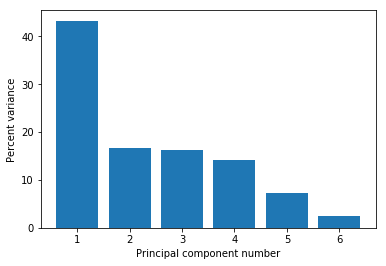

In [94]:
# Perform PCA 
variance, loadings = perform_pca(geo_chem)

# Plot
plt.figure()
plt.bar(np.linspace(1,len(variance),len(variance)),variance*100)
plt.xlabel('Principal component number')
plt.ylabel('Percent variance')
plt.show()

## Loadings 

We can also display the loadings for the PCs. This is basically where you can see your correlations. 

**However, be very careful when interpreting these results.** Their interpretion is greatly dependent on your initial assumptions of what the dataset represents to begin with. For example, if we assume that your table contains only wells have been predetermined to be good reservoirs, then we may be able to make the interpretation that **calcium** content is a good indicator due to its large loading value in PC1. I'm by no means an expert on PCA so take my interpretation with a grain of salt. 

What I can say with a little bit more confidence is that from looking at these values, is that calcium and magnesium are likely negatively correlated with each other. Again, if you assume this inital dataset contains only wells that have good geothermal potential, then in other datasets, you would look for wells where calcium and magnesium have high and low values. 

In [95]:
# Table of loadings
loading_tab = pd.DataFrame(loadings, index = geo_chem.columns)
loading_tab.columns = ["PC{:02d}".format(x) for x in range(1,len(variance)+1)]

display(loading_tab)

,PC01,PC02,PC03,PC04,PC05,PC06
Sodium(mg/l),0.055699,0.571113,0.495958,0.561850,-0.141237,-0.298549
Calcium(mg/l),0.969328,0.016411,-0.067844,0.030164,0.228710,0.048101
Magnesium(mg/l),-0.226120,0.114423,0.119748,0.102504,0.946772,0.120638
Chloride(mg/l),0.008349,0.130805,0.261440,0.088527,-0.175708,0.935820
Bicarbonate(mg/l),0.078081,-0.314816,0.810188,-0.468830,0.022124,-0.134531
Sulfate(mg/l),0.002229,0.737733,-0.101627,-0.667285,-0.002000,-0.011997


## Including some other variables 

Here I include a few of the other non-geochem variables. I definitely haven't looked at this so interpret the results as you will. 

In [96]:
# Other variables 
other = pd.DataFrame(data, columns = [
        'TVD(m)', 'TDS Calculated(Kg/m3)', 'pH', 'Density(Kg/m3)',
        'Resistivity(Ohm-m)'])

# Normalize data by mean and standard deviation (Z-score)
other = (other - other.mean())/other.std(ddof=0)

# Dealing with NaN values 
other = other.fillna(other.mean())

final_mat = other.join(geo_chem)

# Perform PCA 
variance, loadings = perform_pca(final_mat)

## Useful links

http://strata.uga.edu/8370/lecturenotes/principalComponents.html